Chapter 12

# 条件高斯分布
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

该代码分析了二维正态分布的联合分布、边缘分布和条件分布，并通过可视化展示它们之间的关系，尤其是在给定 $Y$ 的某个特定值时的条件分布 $f_{X|Y}(x|y)$。

### 1. 参数设定
代码首先定义二维正态分布的均值向量 $\mu = [\mu_X, \mu_Y] = [0, 0]$ 和协方差矩阵 $\Sigma$，其中：
\[
\Sigma = \begin{bmatrix} \sigma_X^2 & \sigma_X \sigma_Y \rho \\ \sigma_X \sigma_Y \rho & \sigma_Y^2 \end{bmatrix}
\]
这里 $\sigma_X = 1.5$ 和 $\sigma_Y = 1$ 分别表示 $X$ 和 $Y$ 的标准差，$\rho = 0.5$ 表示它们的相关系数。

### 2. 二维网格生成
生成 $X$ 和 $Y$ 的取值区间 $[-4, 4]$，并创建二维网格 $(XX, YY)$，然后基于网格计算出二维正态分布的联合概率密度函数 $f_{X,Y}(x,y)$，即：
\[
f_{X,Y}(x, y) = \text{bi\_norm.pdf}([x, y] \mid \mu, \Sigma)
\]

### 3. 联合分布、边缘分布和条件分布的可视化
- **联合分布**：在图的左上角绘制 $f_{X,Y}(x,y)$ 的等高线图，同时标注均值线（黑色虚线）以及 $Y$ 的条件线（红色虚线），用来表示给定 $Y = y_{\text{cond}}$ 的情况。
  
- **$Y$ 的边缘分布**：在右上角绘制 $Y$ 的边缘概率密度函数 $f_Y(y)$。红色虚线表示特定 $y_{\text{cond}}$，对应的概率值 $f_Y(y_{\text{cond}})$ 标记在图上。

- **条件分布**：在左下角绘制给定 $Y = y_{\text{cond}}$ 时的联合分布 $f_{X,Y}(x, y_{\text{cond}})$，并进一步计算条件分布 $f_{X|Y}(x|y_{\text{cond}})$，其均值通过公式 $x_{\text{sym\_axis}} = \mu_X + \rho \sigma_X / \sigma_Y \cdot (Y[y_{\text{cond}}] - \mu_Y)$ 计算。

### 4. 边缘分布、联合分布和条件分布的比较
代码最后比较了 $X$ 的边缘分布、联合分布和条件分布，绘制 $f_X(x)$、$f_{X,Y}(x, y_{\text{cond}})$ 和 $f_{X|Y}(x|y_{\text{cond}})$ 的曲线。

In [1]:
import numpy as np  # 导入数值计算库numpy
import matplotlib.pyplot as plt  # 导入绘图库matplotlib
import matplotlib.gridspec as gridspec  # 导入网格布局工具
from matplotlib import cm  # 导入颜色映射库
from mpl_toolkits.axes_grid1 import make_axes_locatable  # 导入辅助轴工具
from scipy.stats import multivariate_normal  # 导入多变量正态分布
from scipy.stats import norm  # 导入正态分布

## 定义分布参数

In [2]:
rho = 0.5  # 相关系数
sigma_X = 1.5  # X的标准差
sigma_Y = 1  # Y的标准差
mu_X = 0  # X的均值
mu_Y = 0  # Y的均值
mu = [mu_X, mu_Y]  # 均值向量

In [3]:
# 协方差矩阵
Sigma = [[sigma_X**2, sigma_X * sigma_Y * rho], 
         [sigma_X * sigma_Y * rho, sigma_Y**2]]  # 构建协方差矩阵

In [4]:
# 定义变量范围
width = 4  # 变量范围宽度
X = np.linspace(-width, width, 81)  # X的取值范围
Y = np.linspace(-width, width, 81)  # Y的取值范围

XX, YY = np.meshgrid(X, Y)  # 生成网格数据

XXYY = np.dstack((XX, YY))  # 组合X和Y的网格
bi_norm = multivariate_normal(mu, Sigma)  # 定义二维正态分布对象

## 可视化联合概率密度函数

In [5]:
y_cond_i = 60  # 选择特定的Y值索引

In [6]:
f_X_Y_joint = bi_norm.pdf(XXYY)  # 计算联合概率密度

In [7]:
## 绘制分布图

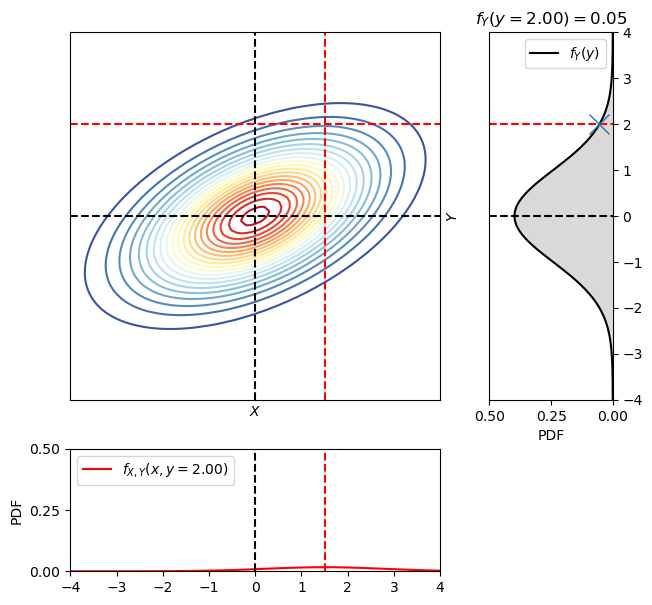

In [8]:
fig = plt.figure(figsize=(7, 7))  # 创建图形窗口
gs = gridspec.GridSpec(2, 2, width_ratios=[3, 1], height_ratios=[3, 1])  # 创建网格布局

# 左上角绘制联合分布的等高线
ax1 = plt.subplot(gs[0])  # 创建子图

# 绘制二维正态分布的等高线
ax1.contour(XX, YY, f_X_Y_joint, 20, cmap=cm.RdYlBu_r)  # 绘制等高线
ax1.axvline(x=mu_X, color='k', linestyle='--')  # X轴的均值垂直线
ax1.axhline(y=mu_Y, color='k', linestyle='--')  # Y轴的均值水平线
ax1.axhline(y=Y[y_cond_i], color='r', linestyle='--')  # 选择的Y值的水平线

x_sym_axis = mu_X + rho * sigma_X / sigma_Y * (Y[y_cond_i] - mu_Y)  # 计算X的对称轴位置
ax1.axvline(x=x_sym_axis, color='r', linestyle='--')  # 绘制X的对称轴

ax1.set_xlabel('$X$')  # 设置X轴标签
ax1.set_ylabel('$Y$')  # 设置Y轴标签
ax1.yaxis.set_label_position('right')  # 设置Y轴标签位置
ax1.set_xticks([])  # 隐藏X轴刻度
ax1.set_yticks([])  # 隐藏Y轴刻度

# 右上角绘制Y的边缘分布
ax2 = plt.subplot(gs[1])  # 创建子图
f_Y = norm.pdf(Y, loc=mu_Y, scale=sigma_Y)  # 计算Y的边缘分布

ax2.plot(f_Y, Y, 'k', label='$f_{Y}(y)$')  # 绘制Y的边缘分布
ax2.axhline(y=mu_Y, color='k', linestyle='--')  # Y的均值线
ax2.axhline(y=Y[y_cond_i], color='r', linestyle='--')  # 选择的Y值水平线
ax2.plot(f_Y[y_cond_i], Y[y_cond_i], marker='x', markersize=15)  # 绘制选择的Y值

plt.title('$f_{Y}(y_{} = %.2f) = %.2f$' % (Y[y_cond_i], f_Y[y_cond_i]))  # 设置标题

ax2.fill_between(f_Y, Y, edgecolor='none', facecolor='#D9D9D9')  # 填充边缘分布区域
ax2.legend(loc=0)  # 设置图例位置
ax2.set_xlabel('PDF')  # 设置X轴标签
ax2.set_ylim(-width, width)  # 设置Y轴范围
ax2.set_xlim(0, 0.5)  # 设置X轴范围
ax2.invert_xaxis()  # 反转X轴
ax2.yaxis.tick_right()  # Y轴刻度在右侧

# 左下角绘制联合分布的条件分布
ax3 = plt.subplot(gs[2])  # 创建子图
f_X_Y_cond_i = f_X_Y_joint[y_cond_i, :]  # 选择特定Y条件下的联合分布

ax3.plot(X, f_X_Y_cond_i, 'r', label='$f_{X,Y}(x,y_{} = %.2f)$' % (Y[y_cond_i]))  # 绘制条件分布

ax3.axvline(x=mu_X, color='k', linestyle='--')  # 绘制X的均值线
ax3.axvline(x=x_sym_axis, color='r', linestyle='--')  # 绘制X的对称轴线

ax3.legend(loc=0)  # 显示图例
ax3.set_ylabel('PDF')  # 设置Y轴标签
ax3.yaxis.set_label_position('left')  # 设置Y轴标签位置
ax3.set_xlim(-width, width)  # 设置X轴范围
ax3.set_ylim(0, 0.5)  # 设置Y轴范围
ax3.set_yticks([0, 0.25, 0.5])  # 设置Y轴刻度

ax4 = plt.subplot(gs[3])  # 创建占位子图
ax4.set_visible(False)  # 隐藏该子图

## 比较联合分布、边缘分布和条件分布

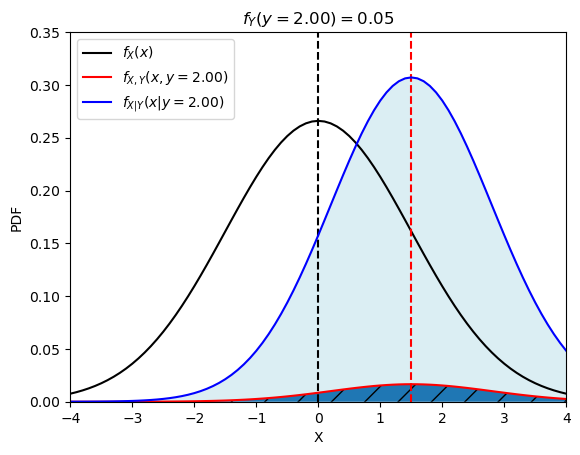

In [9]:
f_X = norm.pdf(X, loc=mu_X, scale=sigma_X)  # 计算X的边缘分布

fig, ax = plt.subplots()  # 创建图形窗口

colors = plt.cm.RdYlBu_r(np.linspace(0, 1, len(Y)))  # 定义颜色

f_X_given_Y_cond_i = f_X_Y_cond_i / f_Y[y_cond_i]  # 计算条件分布

plt.plot(X, f_X, color='k', label='$f_{X}(x)$')  # 绘制X的边缘分布
ax.axvline(x=mu_X, color='k', linestyle='--')  # 绘制X的均值线

plt.plot(X, f_X_Y_cond_i, color='r', label='$f_{X,Y}(x,y_{} = %.2f)$' % (Y[y_cond_i]))  # 绘制联合分布
ax.axvline(x=x_sym_axis, color='r', linestyle='--')  # 绘制X的对称轴线

plt.plot(X, f_X_given_Y_cond_i, color='b', label='$f_{X|Y}(x|y_{} = %.2f)$' % (Y[y_cond_i]))  # 绘制条件分布

ax.fill_between(X, f_X_given_Y_cond_i, edgecolor='none', facecolor='#DBEEF3')  # 填充条件分布区域

ax.fill_between(X, f_X_Y_cond_i, edgecolor='none', hatch='/')  # 填充联合分布区域

plt.xlabel('X')  # 设置X轴标签
plt.ylabel('PDF')  # 设置Y轴标签
ax.set_xlim(-width, width)  # 设置X轴范围
ax.set_ylim(0, 0.35)  # 设置Y轴范围
plt.title('$f_{Y}(y_{} = %.2f) = %.2f$' % (Y[y_cond_i], f_Y[y_cond_i]))  # 设置标题
ax.legend()  # 显示图例